# About
The idea is to use Kmeans clustering to generate new features for the TPS6 competition. This competition uses anonymized data.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib
import matplotlib.pyplot as plt
print("matplotlib version: {}". format(matplotlib.__version__))

import sklearn # machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

matplotlib version: 3.4.0
scikit-learn version: 0.24.1
/kaggle/input/tabular-playground-series-jun-2021/sample_submission.csv
/kaggle/input/tabular-playground-series-jun-2021/train.csv
/kaggle/input/tabular-playground-series-jun-2021/test.csv


In [2]:
df_train = pd.read_csv('../input/tabular-playground-series-jun-2021/train.csv')
df_test = pd.read_csv('../input/tabular-playground-series-jun-2021/test.csv')
sample_submission = pd.read_csv('../input/tabular-playground-series-jun-2021/sample_submission.csv') 

# append train and test features to prepare data for clustering
X = df_train.drop(columns=["id","target"]).append(df_test.drop(columns="id"))
display(X.shape)
X.head()

(300000, 75)

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74
0,0,0,6,1,0,0,0,0,7,0,...,3,0,0,0,0,0,0,2,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,3,0,0,...,8,0,0,0,0,1,0,0,0,0
3,0,0,7,0,1,5,2,2,0,1,...,0,0,4,0,2,2,0,4,3,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# scale before using Kmeans 
X_scaled = StandardScaler().fit_transform(X)
X_scaled[0]

array([-0.24665278, -0.29168803,  0.5878527 , -0.17232163, -0.27004876,
       -0.27745879, -0.25629017, -0.30091585,  1.28519864, -0.2910902 ,
       -0.43363598, -0.25592084,  0.16342896, -0.28997491, -0.14189346,
       -0.17095119, -0.45507291,  2.56531253,  0.52580434, -0.37045834,
       -0.53850118,  0.33032208, -0.21637646, -0.34114044, -0.18593801,
       -0.32104851, -0.44279197, -0.22501113, -0.1563264 , -0.28299244,
       -0.42455693, -0.22006525, -0.19471497, -0.39726496, -0.29692403,
       -0.33775469, -0.25248126,  3.26205054, -0.29843843, -0.51624812,
       -0.27903972, -0.21431983, -0.23877397,  0.5812892 , -0.4119542 ,
       -0.31616878, -0.24618664, -0.16529865, -0.34822781, -0.23288902,
        0.14001106, -0.31308334,  0.19483274,  0.56285122, -0.53097194,
       -0.28343612, -0.51528547, -0.27892199, -0.34433605, -0.21713919,
       -0.26145174, -0.05230233, -0.21380514, -0.2040728 , -0.31992405,
        0.23755036, -0.27224754, -0.25400005, -0.23808471, -0.32

In [4]:
# run Kmeans
num_clusters = 9 # I chose 9 clusters because the target variable has 9 values
k_means = KMeans(init = "k-means++", n_clusters = num_clusters, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[5 5 5 ... 5 5 5]


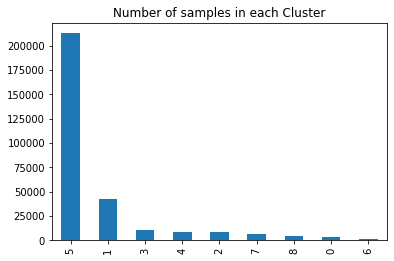

In [5]:
cluster_labels = pd.Series(labels)
cluster_labels.value_counts().plot(kind="bar")
plt.title("Number of samples in each Cluster")
plt.show()

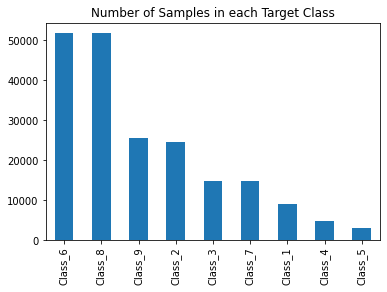

In [6]:
df_train.target.value_counts().plot(kind="bar")
plt.title("Number of Samples in each Target Class")
plt.show()

The number of samples in each Cluster does not match at all with the number of samples in each target class. But as this is experimental, let's keep it as an additional feature. 

In [7]:
# compute distance of each sample to cluster centers
dist = k_means.transform(X)
dist

array([[ 74.25436603,  29.51333858,  62.06411599, ..., 155.04827697,
         64.76379246,  64.28100494],
       [ 74.99693034,  30.46449928,  61.68039091, ..., 156.08579203,
         64.45002048,  65.09651516],
       [ 73.62861734,  26.53497426,  61.43194819, ..., 151.0154298 ,
         64.12652179,  63.60002241],
       ...,
       [ 75.25480831,  30.73915966,  62.74241133, ..., 156.20758984,
         65.52462333,  65.36350069],
       [ 73.78694869,  29.43752341,  61.8028746 , ..., 154.89420829,
         62.74168102,  63.04556242],
       [ 74.26582391,  29.44699167,  62.15747982, ..., 155.07035697,
         63.98709881,  64.41286797]])

In [8]:
column_labels = [f'Dist_{i}' for i in range(0, 9)]
kmeans_features = pd.DataFrame(data=dist, columns=column_labels)
kmeans_features["Cluster"] = labels
kmeans_features.head()

,Dist_0,Dist_1,Dist_2,Dist_3,Dist_4,Dist_5,Dist_6,Dist_7,Dist_8,Cluster
0,74.254366,29.513339,62.064116,54.703726,33.230144,16.208328,155.048277,64.763792,64.281005,5
1,74.996930,30.464499,61.680391,54.647196,38.813504,8.488975,156.085792,64.450020,65.096515,5
2,73.628617,26.534974,61.431948,53.994395,39.755983,13.818000,151.015430,64.126522,63.600022,5
3,81.110466,52.944724,73.448297,53.320436,61.471973,52.468816,159.861616,77.331829,76.120440,5
4,74.852919,30.227004,62.372260,52.061608,40.204648,8.562651,156.043318,65.132223,64.884620,5


In [9]:
# save 
kmeans_features.to_csv("kmeans_features.csv", index=False)